In [1]:
from PIL import Image
import numpy as np

In [8]:
img1=Image.open('data/idda/images/100065_T01_HRN_A.jpg')
img2=Image.open('data/idda/images/100411_T01_CS_J.jpg')

In [2]:
import json
f=open('data/idda/client_styles.json')
FDAstyles=json.load(f)
f.close()
f=open('data/idda/mean_styles.json')
MeanStyles=json.load(f)

for key in FDAstyles:
    FDAstyles[key].update(MeanStyles[key])
print(FDAstyles)

with open("data/idda/clients_styles.json", "w") as fp:
    json.dump(FDAstyles,fp,indent=2) 

{'T03_HRN_J': {'FDA': {'pos': [[[116114.046875, 22008.87890625, 6872.1650390625, 4505.2587890625], [21320.5390625, 10102.20703125, 5358.53662109375, 2869.460205078125], [17452.90234375, 8897.005859375, 4264.3134765625, 3676.834716796875], [8710.1513671875, 4668.3564453125, 4036.08740234375, 2665.933349609375]], [[110804.453125, 21581.916015625, 6638.88134765625, 4695.56787109375], [19836.19921875, 10057.1259765625, 5712.6142578125, 3000.33056640625], [17995.685546875, 8216.287109375, 4223.5390625, 3772.446533203125], [7726.91015625, 3599.06005859375, 4007.076904296875, 2638.27490234375]], [[104704.828125, 20897.8671875, 7009.83056640625, 4927.35498046875], [20358.138671875, 10830.3564453125, 6027.09912109375, 2800.56005859375], [19863.3046875, 7552.73681640625, 4635.76953125, 3457.285888671875], [8118.078125, 3766.139404296875, 4008.619140625, 2935.742431640625]]], 'neg': [[[8710.1513671875, 5969.26318359375, 3604.677734375, 2382.02880859375], [17452.90234375, 6573.6591796875, 3725.129

In [11]:
a=np.asarray(img1)
a=a[:,:,np.newaxis,:]
b=np.asarray(img2)
b=b[:,:,np.newaxis,:]
print(a.shape)
print(b.shape)
c=np.concatenate((a,b),2)
print(c.shape)

(1080, 1920, 1, 3)
(1080, 1920, 1, 3)
(1080, 1920, 2, 3)


In [39]:
import json
def extractMeansVarDictionary(root='data/idda'):
    styles={}
    for fileName in ['/test_diff_dom.json','/test_same_dom.json','/train.json']:
        print(fileName)
        f=open(root+fileName)
        clients=json.load(f)
        for key in clients:
            styles[key]={}
            a=None
            for im in clients[key]:
                img=Image.open(root+'/images/'+im+'.jpg')
                if a is None:
                    a=np.asarray(img)
                    a=a[:,:,np.newaxis,:]/255
                else:
                    c=np.asarray(img)
                    c=c[:,:,np.newaxis,:]/255
                    a=np.concatenate((a,c),2)
            print(key)
            styles[key]['mean']=np.mean(a,(0,1,2)).tolist()
            styles[key]['variance']=np.var(a,(0,1,2)).tolist()
        f.close()
    return styles

In [38]:
extractMeansVarDictionary()

/test_diff_dom.json
T03_HRN_J
[0.03032256 0.02872394 0.03044551]
[0.22350216 0.21325866 0.20149471]
T02_HRN_J
[0.04182059 0.04230509 0.04290485]
[0.22099693 0.21767028 0.23456994]
T01_HRN_J
[0.04609778 0.04668639 0.05114141]
[0.29158262 0.30867536 0.30205647]
T02_HRN_A
[0.04819169 0.04096943 0.04110176]
[0.23873716 0.19255404 0.20940989]
T03_HRN_A
[0.02794981 0.02796891 0.02843493]
[0.23129386 0.22804319 0.22856781]
T01_HRN_A
[0.05484079 0.05396131 0.0539466 ]
[0.37118482 0.33634641 0.33911428]
/test_same_dom.json
T02_CN_A
[0.06477707 0.0626893  0.06861328]
[0.37895528 0.35462365 0.37620715]
T03_CS_A
[0.03918069 0.03411774 0.03388304]
[0.20993631 0.17455749 0.18512289]
T01_CN_J
[0.05666375 0.05943163 0.06771694]
[0.35494395 0.3770815  0.3848761 ]
T01_CS_J
[0.07452395 0.05608766 0.04352051]
[0.33293925 0.26800507 0.24789394]
T03_CN_A
[0.04033367 0.04626077 0.06131003]
[0.34200539 0.34335519 0.36723715]
T02_CS_A
[0.086007   0.07513574 0.04945228]
[0.31506194 0.22653084 0.16791942]
T03_CS

KeyboardInterrupt: 

In [41]:
styles=extractMeansVarDictionary()

/test_diff_dom.json
T03_HRN_J
T02_HRN_J
T01_HRN_J
T02_HRN_A
T03_HRN_A
T01_HRN_A
/test_same_dom.json
T02_CN_A
T03_CS_A
T01_CN_J
T01_CS_J
T03_CN_A
T02_CS_A
T03_CS_J
T01_CN_A
T02_CN_J
T02_CS_J
T01_CS_A
T03_CN_J
/train.json
T02_CN_A_U1
T02_CN_A_U2
T03_CS_A_U1
T03_CS_A_U2
T01_CN_J_U1
T01_CN_J_U2
T01_CS_J_U1
T01_CS_J_U2
T03_CN_A_U1
T03_CN_A_U2
T02_CS_A_U1
T02_CS_A_U2
T03_CS_J_U1
T03_CS_J_U2
T01_CN_A_U1
T01_CN_A_U2
T02_CN_J_U1
T02_CN_J_U2
T02_CS_J_U1
T02_CS_J_U2
T01_CS_A_U1
T01_CS_A_U2
T03_CN_J_U1
T03_CN_J_U2


In [42]:
print(styles)

{'T03_HRN_J': {'mean': [0.22350216120119876, 0.21325866452826525, 0.2014947096433379], 'variance': [0.030322561085406832, 0.028723939881724708, 0.030445512075890833]}, 'T02_HRN_J': {'mean': [0.2209969282932494, 0.21767028381159567, 0.2345699421676194], 'variance': [0.04182058883091893, 0.04230509393712974, 0.04290485212358364]}, 'T01_HRN_J': {'mean': [0.2915826204038833, 0.308675356818762, 0.3020564656397181], 'variance': [0.04609778134974527, 0.046686391323194285, 0.051141405240160004]}, 'T02_HRN_A': {'mean': [0.2387371616231279, 0.19255403887330122, 0.20940988974757388], 'variance': [0.04819168688230661, 0.04096943206712217, 0.04110175811471572]}, 'T03_HRN_A': {'mean': [0.2312938555739027, 0.22804318760531994, 0.2285678099377183], 'variance': [0.02794981007087898, 0.027968908554655784, 0.028434925598808666]}, 'T01_HRN_A': {'mean': [0.3711848158656233, 0.336346406392955, 0.33911428191745846], 'variance': [0.05484079486095018, 0.05396131033410356, 0.05394660024245236]}, 'T02_CN_A': {'m

In [47]:
stylesFDA=extractFDAstylesDict(7)
print(stylesFDA)

Extracting style of T03_HRN_J


c:\Users\ollob\anaconda3\envs\mldl23fl_6\lib\site-packages\torchvision\transforms\functional.py:442: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


Extracting style of T02_HRN_J
Extracting style of T01_HRN_J
Extracting style of T02_HRN_A
Extracting style of T03_HRN_A
Extracting style of T01_HRN_A
Extracting style of T02_CN_A
Extracting style of T03_CS_A
Extracting style of T01_CN_J
Extracting style of T01_CS_J
Extracting style of T03_CN_A
Extracting style of T02_CS_A
Extracting style of T03_CS_J
Extracting style of T01_CN_A
Extracting style of T02_CN_J
Extracting style of T02_CS_J
Extracting style of T01_CS_A
Extracting style of T03_CN_J
Extracting style of T02_CN_A_U1
Extracting style of T02_CN_A_U2
Extracting style of T03_CS_A_U1
Extracting style of T03_CS_A_U2
Extracting style of T01_CN_J_U1
Extracting style of T01_CN_J_U2
Extracting style of T01_CS_J_U1
Extracting style of T01_CS_J_U2
Extracting style of T03_CN_A_U1
Extracting style of T03_CN_A_U2
Extracting style of T02_CS_A_U1
Extracting style of T02_CS_A_U2
Extracting style of T03_CS_J_U1
Extracting style of T03_CS_J_U2
Extracting style of T01_CN_A_U1
Extracting style of T0

In [50]:
stylesFDA=extractFDAstylesDict(7)
for key in stylesFDA:
    fda={}
    fda['pos']=stylesFDA[key]['pos'].numpy().tolist()
    fda['neg']=stylesFDA[key]['neg'].numpy().tolist()
    stylesFDA[key]={}
    stylesFDA[key]['FDA']=fda
print(stylesFDA)

Extracting style of T03_HRN_J


c:\Users\ollob\anaconda3\envs\mldl23fl_6\lib\site-packages\torchvision\transforms\functional.py:442: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


Extracting style of T02_HRN_J
Extracting style of T01_HRN_J
Extracting style of T02_HRN_A
Extracting style of T03_HRN_A
Extracting style of T01_HRN_A
Extracting style of T02_CN_A
Extracting style of T03_CS_A
Extracting style of T01_CN_J
Extracting style of T01_CS_J
Extracting style of T03_CN_A
Extracting style of T02_CS_A
Extracting style of T03_CS_J
Extracting style of T01_CN_A
Extracting style of T02_CN_J
Extracting style of T02_CS_J
Extracting style of T01_CS_A
Extracting style of T03_CN_J
Extracting style of T02_CN_A_U1
Extracting style of T02_CN_A_U2
Extracting style of T03_CS_A_U1
Extracting style of T03_CS_A_U2
Extracting style of T01_CN_J_U1
Extracting style of T01_CN_J_U2
Extracting style of T01_CS_J_U1
Extracting style of T01_CS_J_U2
Extracting style of T03_CN_A_U1
Extracting style of T03_CN_A_U2
Extracting style of T02_CS_A_U1
Extracting style of T02_CS_A_U2
Extracting style of T03_CS_J_U1
Extracting style of T03_CS_J_U2
Extracting style of T01_CN_A_U1
Extracting style of T0

In [54]:

import json

with open("data/idda/client_styles.json", "w") as fp:
    json.dump(styles,fp,indent=2) 

{'T03_HRN_J': {'FDA': {'pos': [[[116114.046875, 22008.87890625, 6872.1650390625, 4505.2587890625], [21320.5390625, 10102.20703125, 5358.53662109375, 2869.460205078125], [17452.90234375, 8897.005859375, 4264.3134765625, 3676.834716796875], [8710.1513671875, 4668.3564453125, 4036.08740234375, 2665.933349609375]], [[110804.453125, 21581.916015625, 6638.88134765625, 4695.56787109375], [19836.19921875, 10057.1259765625, 5712.6142578125, 3000.33056640625], [17995.685546875, 8216.287109375, 4223.5390625, 3772.446533203125], [7726.91015625, 3599.06005859375, 4007.076904296875, 2638.27490234375]], [[104704.828125, 20897.8671875, 7009.83056640625, 4927.35498046875], [20358.138671875, 10830.3564453125, 6027.09912109375, 2800.56005859375], [19863.3046875, 7552.73681640625, 4635.76953125, 3457.285888671875], [8118.078125, 3766.139404296875, 4008.619140625, 2935.742431640625]]], 'neg': [[[8710.1513671875, 5969.26318359375, 3604.677734375, 2382.02880859375], [17452.90234375, 6573.6591796875, 3725.129

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x1080 at 0x19255CB3A00>


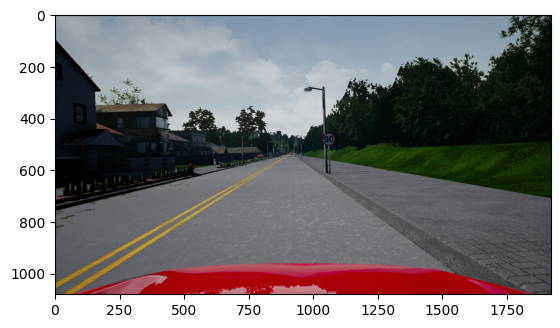

In [1]:
from PIL import Image
import utils.ss_transforms as sstr
import matplotlib.pyplot as plt
import numpy as np
im_src = Image.open("data/idda/images/102445_T01_CN_A.jpg")
print(im_src)
plt.imshow(im_src)

torch.Size([3, 540, 960])


c:\Users\ollob\anaconda3\envs\mldl23fl_6\lib\site-packages\torchvision\transforms\functional.py:442: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


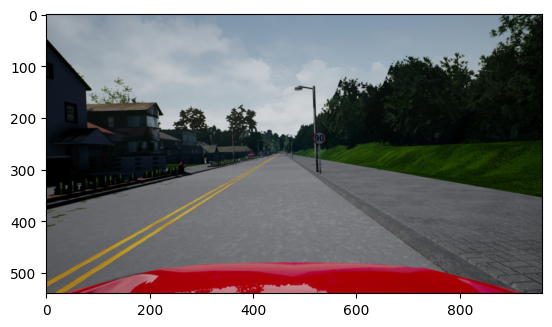

In [2]:

converter=sstr.Compose([sstr.Resize((540,960)),sstr.ToTensor()])
img=converter(im_src)
print(img.shape)
plt.imshow(img.permute(1,2,0))

torch.Size([3, 540, 960])
torch.Size([3, 540, 960]) torch.Size([3, 540, 960])
tensor([[[195896.6406,  42693.3594,   3543.0291,  ...,   8905.1602,
            3543.0291,  42693.3594],
         [ 50640.4062,  11762.8877,   9281.4697,  ...,   6793.2358,
            8723.4932,  18497.2949],
         [ 17256.1875,  13519.8047,   7670.8447,  ...,   3385.2434,
            3635.6697,  10797.0059],
         ...,
         [ 11854.8828,   8053.4951,   3854.7114,  ...,   2601.1875,
            5259.7510,  13287.9971],
         [ 17256.1855,  10797.0059,   3635.6699,  ...,   3834.8279,
            7670.8452,  13519.8037],
         [ 50640.4023,  18497.2949,   8723.4922,  ...,   4045.1396,
            9281.4697,  11762.8877]],

        [[188084.6562,  36450.1992,    609.7504,  ...,   9026.9287,
             609.7502,  36450.1992],
         [ 32255.4414,  10267.2432,   7031.4546,  ...,   7243.2407,
            8486.0605,  25727.6660],
         [ 37114.1562,  21109.6602,   8764.3535,  ...,   3210.0247

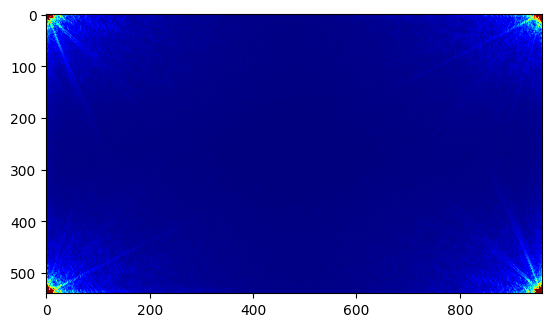

In [3]:
import torch
im_fft=torch.fft.fft2(img)
print(im_fft.shape)
im_ampl=im_fft.abs()
im_phase=im_fft.angle()
print(im_ampl.shape,im_phase.shape)
print(im_ampl)
plt.imshow(im_ampl[1]/im_ampl[1].max(),cmap='jet',vmax=0.005)

In [4]:
print(im_ampl[:,:5,:5])
print(im_ampl[:,-5:,:5])

tensor([[[195896.6406,  42693.3594,   3543.0291,   8905.1602,   2512.2839],
         [ 50640.4062,  11762.8877,   9281.4697,   4045.1396,   4983.2549],
         [ 17256.1875,  13519.8047,   7670.8447,   3834.8279,   3812.0457],
         [ 11854.8848,  13287.9971,   5259.7515,   2601.1875,   3827.2654],
         [  3426.9194,   1898.5870,   5566.7852,   1850.2732,   2695.0229]],

        [[188084.6562,  36450.1992,    609.7504,   9026.9268,   2035.1444],
         [ 32255.4414,  10267.2432,   7031.4546,   3361.1819,   5283.2202],
         [ 37114.1562,  21109.6602,   8764.3535,   3298.5874,   4675.5903],
         [ 11464.6416,   8366.2275,   7117.2900,   2665.3755,   3313.8284],
         [ 15797.2920,   5254.7778,   6051.6504,    602.5627,   3254.8179]],

        [[190596.4375,  42261.2617,    928.6702,   9938.3779,   2646.0984],
         [ 41533.9883,  14688.5576,   6825.2261,   4454.2827,   6303.9219],
         [ 38793.1094,  18651.5918,   9008.4805,   1242.6222,   5900.1382],
        

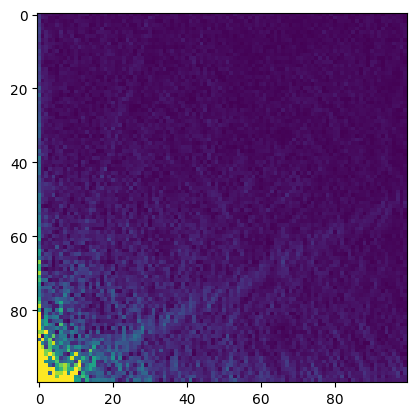

In [5]:
plt.imshow(im_ampl[1,-100:,:100],vmax=2000)

In [6]:
from utils.FDA import extractClientsStyles

styles=extractClientsStyles(11)

Extracting style of T02_CN_A_U1
Extracting style of T02_CN_A_U2
Extracting style of T03_CS_A_U1
Extracting style of T03_CS_A_U2
Extracting style of T01_CN_J_U1
Extracting style of T01_CN_J_U2
Extracting style of T01_CS_J_U1
Extracting style of T01_CS_J_U2
Extracting style of T03_CN_A_U1
Extracting style of T03_CN_A_U2
Extracting style of T02_CS_A_U1
Extracting style of T02_CS_A_U2
Extracting style of T03_CS_J_U1
Extracting style of T03_CS_J_U2
Extracting style of T01_CN_A_U1
Extracting style of T01_CN_A_U2
Extracting style of T02_CN_J_U1
Extracting style of T02_CN_J_U2
Extracting style of T02_CS_J_U1
Extracting style of T02_CS_J_U2
Extracting style of T01_CS_A_U1
Extracting style of T01_CS_A_U2
Extracting style of T03_CN_J_U1
Extracting style of T03_CN_J_U2


In [7]:
print(styles)

{'T02_CN_A_U1': {'pos': tensor([[[220682.8750,  25517.7266,  10766.0430,   6996.4092,   3720.1873,
            4006.0613],
         [ 40003.7500,  14343.4775,   9587.3779,   5086.8745,   3751.0996,
            3085.4395],
         [ 11754.3945,   9322.2148,   5456.9629,   4837.6836,   3550.2637,
            2674.7947],
         [ 16760.5371,   6094.3252,   3905.2737,   3738.3613,   3104.5278,
            2406.7068],
         [  9386.6309,   4727.2261,   3164.9077,   2755.2612,   2978.7390,
            2339.6279],
         [  8515.7998,   3126.2380,   3104.3228,   2508.1670,   2209.7065,
            1821.4139]],

        [[207244.7344,  22900.1230,  11852.2490,   7283.1479,   4276.5630,
            4270.6670],
         [ 23044.4316,  16055.5576,   9588.5371,   5058.5396,   4008.9873,
            3104.3135],
         [ 28558.2324,  10873.7588,   6194.4175,   5332.4824,   3676.0688,
            2881.2859],
         [  9063.8633,   5744.5654,   4852.8960,   3676.9866,   3421.1106,
        

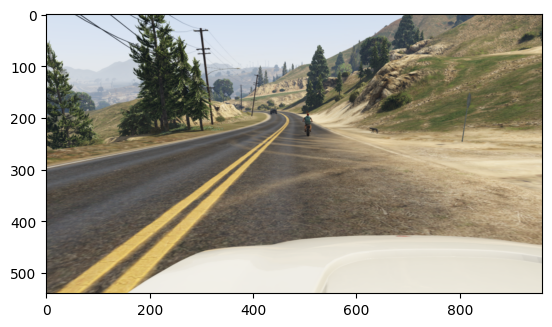

In [8]:
from utils.FDA import applyStyle
converter=sstr.Compose([sstr.Resize((540,960)),sstr.ToTensor()])
img=converter(Image.open('./data/GTA5/images/00028.png'))
plt.imshow(img.permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[ 0.3911,  0.3909,  0.3907,  ...,  0.1055,  0.0660,  0.0619],
         [ 0.3904,  0.3902,  0.3900,  ...,  0.1205,  0.1124,  0.0887],
         [ 0.3897,  0.3895,  0.3893,  ...,  0.1003,  0.1236,  0.0920],
         ...,
         [ 0.0089,  0.0049, -0.0070,  ...,  0.4761,  0.4759,  0.4757],
         [-0.0310, -0.0430, -0.0588,  ...,  0.4754,  0.4752,  0.4750],
         [-0.0553, -0.0712, -0.0870,  ...,  0.4747,  0.4745,  0.4743]],

        [[ 0.4510,  0.4510,  0.4510,  ...,  0.0510,  0.0157,  0.0079],
         [ 0.4501,  0.4501,  0.4501,  ...,  0.0581,  0.0502,  0.0305],
         [ 0.4492,  0.4492,  0.4491,  ...,  0.0495,  0.0651,  0.0297],
         ...,
         [-0.0247, -0.0285, -0.0401,  ...,  0.4730,  0.4731,  0.4732],
         [-0.0609, -0.0726, -0.0882,  ...,  0.4722,  0.4723,  0.4723],
         [-0.0853, -0.0971, -0.1127,  ...,  0.4714,  0.4754,  0.4715]],

        [[ 0.5608,  0.5612,  0.5615,  ..., -0.0050, -0.0321, -0.0357],
         [ 0.5593,  0.5596,  0.5600,  ..., -0

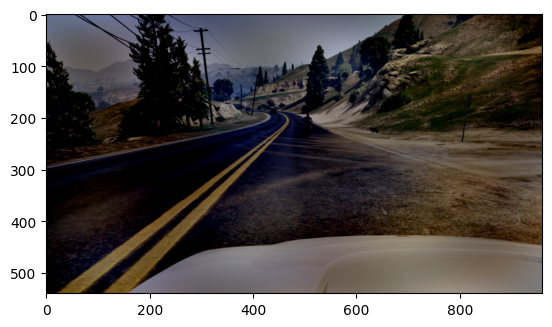

In [9]:
#print(applyStyle(img,styles['T03_CS_J_U2'],11))
plt.imshow(applyStyle(img,styles['T03_CS_J_U2'],7).permute(1,2,0))
print(applyStyle(img,styles['T03_CS_J_U2'],7))

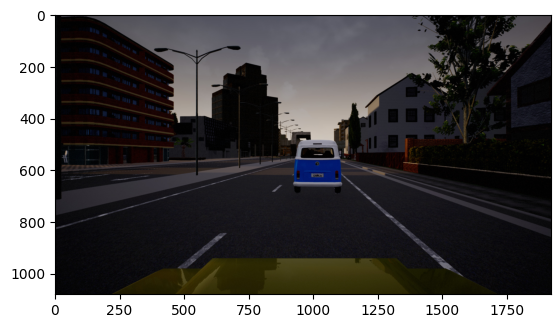

In [10]:

im=Image.open('data/idda/images/14227_T03_CS_J.jpg')
plt.imshow(im)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


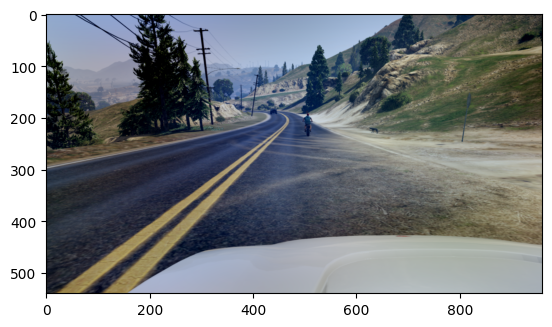

In [11]:
from utils.FDA import applyFDAstyles

trans=sstr.Compose([sstr.Resize((540,960)),sstr.ToTensor(),applyFDAstyles(styles=styles,n=5)])
im=Image.open('./data/GTA5/images/00028.png')
plt.imshow(trans(im).permute(1,2,0))

In [19]:
from utils.FDA import extractAvgStyleTxt
styleIddaTrainAvg=extractAvgStyleTxt(21)
styleGtaAvg=extractAvgStyleTxt(21,'data/GTA5/train.txt','data/GTA5/images/','')

In [20]:
styleDiffDomainAvg=extractAvgStyleTxt(21,'data/idda/test_diff_dom.txt')

In [21]:
print(styleIddaTrainAvg)
print(styleDiffDomainAvg)
print(styleGtaAvg)

{'SingleStyle': {'pos': tensor([[[166581.0469,  27293.9199,   9240.3301,   6374.8818,   4281.6484,
            3618.4546,   2977.0869,   2481.8967,   2226.4792,   1952.3406,
            1796.8325],
         [ 41547.4883,  14223.8779,   8243.9570,   4795.2534,   3685.9951,
            2925.0505,   2652.5632,   2085.7451,   1993.1268,   1662.2062,
            1560.8533],
         [ 19153.9941,   8775.0215,   5521.4224,   3963.8992,   3155.8223,
            2444.2773,   2118.8425,   1750.4319,   1607.5076,   1423.1237,
            1326.5620],
         [ 11743.8164,   6059.8540,   3988.5376,   3089.3083,   2537.6287,
            2164.8884,   1764.8556,   1492.8159,   1311.7002,   1191.7335,
            1133.1360],
         [  8880.0576,   4295.3794,   2977.5427,   2548.3301,   2330.5686,
            1796.9694,   1552.5740,   1400.9929,   1163.5518,   1087.1039,
             989.8760],
         [  6503.4873,   3631.6133,   2618.2136,   2148.2908,   1789.2125,
            1602.9506,   1412.8

In [22]:
import torch
print(((torch.square(styleIddaTrainAvg['SingleStyle']['pos']-styleGtaAvg['SingleStyle']['pos'])).sum()+(torch.square(styleIddaTrainAvg['SingleStyle']['neg']-styleGtaAvg['SingleStyle']['neg'])).sum())/(styleGtaAvg['SingleStyle']['pos'].square().sum()+styleGtaAvg['SingleStyle']['neg'].square().sum()))
print(((torch.square(styleDiffDomainAvg['SingleStyle']['pos']-styleGtaAvg['SingleStyle']['pos'])).sum()+(torch.square(styleDiffDomainAvg['SingleStyle']['neg']-styleGtaAvg['SingleStyle']['neg'])).sum())/(styleGtaAvg['SingleStyle']['pos'].square().sum()+styleGtaAvg['SingleStyle']['neg'].square().sum()))

tensor(0.0840)
tensor(0.1536)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


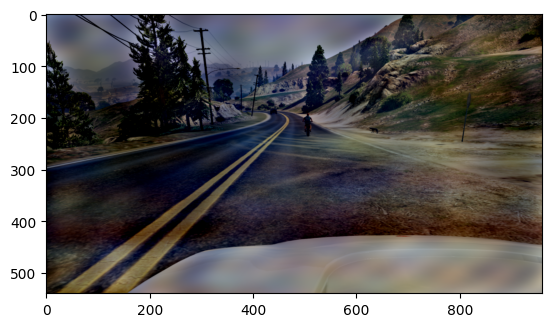

In [25]:
from utils.FDA import applyFDAstyles

trans=sstr.Compose([sstr.Resize((540,960)),sstr.ToTensor(),applyFDAstyles(styles=styleDiffDomainAvg,n=21)])
im=Image.open('./data/GTA5/images/00028.png')
plt.imshow(trans(im).permute(1,2,0))